In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from matplotlib.cm import ScalarMappable

import numpy as np
from itertools import cycle

df = pd.read_csv("reviews.csv")

In [42]:
matrix = pd.pivot_table(df, values='score', index='userName', columns='appId', fill_value=0)


In [43]:
matrix

appId,cc.forestapp,com.anydo,com.appgenix.bizcal,com.appxy.planner,com.artfulagenda.app,com.gmail.jmartindev.timetune,com.habitnow,com.habitrpg.android.habitica,com.levor.liferpgtasks,com.microsoft.todos,com.oristats.habitbull,com.tasks.android,com.ticktick.task,com.todoist,prox.lab.calclock
userName,,,,,,,,,,,,,,,
#1 Myself,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
#JOJO clips,0.0,0.0,0.0,0.0,0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
- ALPHAEIUS -,0.0,2.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--,0.0,0.0,0.0,0.0,0,0.0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-Crispy- -Boi-,0.0,0.0,0.0,0.0,0,0.0,0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
김애용,3.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
마럄,0.0,0.0,0.0,0.0,0,0.0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
민성Eishaal,1.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
app_user_counts = df.groupby('appId')['userName'].nunique()

# Get the top 3 apps with the highest number of users
top_apps = app_user_counts.nlargest(3)

# Display the titles and counts of the top 3 apps
for app_id, user_count in top_apps.items():
    print(f"App Id: {app_id}, Number of Users: {user_count}")

App Id: cc.forestapp, Number of Users: 947
App Id: com.microsoft.todos, Number of Users: 943
App Id: com.anydo, Number of Users: 939


In [45]:
#forest, Microsoft, Any.do

In [46]:
df_filtered = df[df['userName'] != 'A Google user']

# Count the number of ratings for each user
user_app_counts = df_filtered.groupby('userName')['appId'].nunique()

# Get the top 3 users with the highest number of app ratings
top_users = user_app_counts.nlargest(3)

# Display the user names and counts of the top 3 users
for user_name, app_count in top_users.items():
    print(f"User Name: {user_name}, Number of Apps Rated: {app_count}")

User Name: Brajeswar Das, Number of Apps Rated: 4
User Name: Chris, Number of Apps Rated: 4
User Name: Kelly Madison, Number of Apps Rated: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

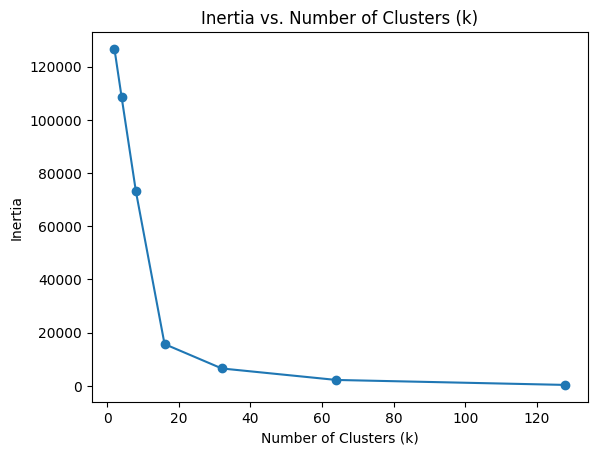

In [47]:
inertia_values = []

# Values of k to try
k_values = [2, 4, 8, 16, 32, 64, 128]

# Apply k-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values for each k
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In k-means clustering, the choice of the number of clusters (k) is crucial and often involves a trade-off between capturing fine-grained patterns in the data and avoiding overfitting. One common method to choose an appropriate k is to look for an "elbow" in the inertia plot, where the rate of decrease of inertia slows down. The idea is to find a point where adding more clusters doesn't significantly reduce inertia.
16 looks good!!

During grading (esp. for the extra credit datasets), we won't be very nitpicky about the quality of the results, and the grading will focus on evaluating the student's understanding of concepts (i.e. picking the elbow in an inertia graph). If the dataset is such that the resulting graph has no elbow, then we can give credit if you mention that there is no elbow in the graph (and I suggest picking a relatively small value of k in this case for better visualization purposes). Let's pick k=16

In [48]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit_predict(matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([10, 12,  8, ...,  0,  6, 11], dtype=int32)

In [61]:
kmeans = KMeans(n_clusters=16, random_state=42)
cluster_assignments = kmeans.fit_predict(matrix)

# Create a mapping between userName and cluster labels
cluster_mapping = dict(zip(matrix.index, cluster_assignments))

# Map the cluster labels back to the original DataFrame df
df['cluster'] = df['userName'].map(cluster_mapping)
df['cluster'] = df['cluster'].astype(int)

#mean_ratings_by_cluster = df.groupby('cluster').mean()
mean_ratings_by_cluster = df.groupby(['appId', 'cluster']).mean().unstack(level='cluster')
mean_ratings_by_cluster = mean_ratings_by_cluster.drop(['thumbsUpCount'],axis=1)
# Find the top three highest-rated apps for each cluster



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-61-855c3146e82e>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ratings_by_cluster = df.groupby(['appId', 'cluster']).mean().unstack(level='cluster')


In [50]:
top_apps_by_cluster = pd.DataFrame()

for cluster, scores in mean_ratings_by_cluster.iteritems():
    top_apps = scores.nlargest(3)
    top_apps_with_score = [(appId, score) for appId, score in zip(top_apps.index, top_apps.values)]
    top_apps_by_cluster[f'Cluster {cluster}'] = top_apps_with_score

# Display the results
top_apps_by_cluster

<ipython-input-50-5b7514212ac4>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, scores in mean_ratings_by_cluster.iteritems():


,"Cluster ('score', 0)","Cluster ('score', 1)","Cluster ('score', 2)","Cluster ('score', 3)","Cluster ('score', 4)","Cluster ('score', 5)","Cluster ('score', 6)","Cluster ('score', 7)","Cluster ('score', 8)","Cluster ('score', 9)","Cluster ('score', 10)","Cluster ('score', 11)","Cluster ('score', 12)","Cluster ('score', 13)","Cluster ('score', 14)","Cluster ('score', 15)"
0,"(com.gmail.jmartindev.timetune, 1.490514905149...","(prox.lab.calclock, 3.6983408748114632)","(cc.forestapp, 3.541160593792173)","(com.anydo, 5.0)","(com.tasks.android, 3.7739403453689166)","(com.todoist, 3.5744089012517386)","(com.habitrpg.android.habitica, 3.549315068493...","(com.appgenix.bizcal, 3.5454545454545454)","(com.anydo, 3.5297297297297296)","(com.anydo, 4.0)","(com.oristats.habitbull, 3.5658807212205272)","(com.tasks.android, 4.666666666666667)","(com.gmail.jmartindev.timetune, 4.097966728280...","(com.ticktick.task, 4.5)","(com.artfulagenda.app, 4.483606557377049)","(com.appxy.planner, 3.5665722379603397)"
1,"(com.levor.liferpgtasks, 1.4299065420560748)","(com.habitnow, 3.5)","(com.tasks.android, 3.0)","(com.microsoft.todos, 3.5453315290933696)","(com.anydo, 3.0)","(com.gmail.jmartindev.timetune, 3.0)","(com.ticktick.task, 3.3333333333333335)","(com.ticktick.task, 3.0)","(com.levor.liferpgtasks, 3.1)","(prox.lab.calclock, 4.0)","(com.appgenix.bizcal, 3.5)","(com.levor.liferpgtasks, 4.2)","(prox.lab.calclock, 3.3333333333333335)","(com.habitnow, 4.369077306733167)","(com.levor.liferpgtasks, 4.0)","(cc.forestapp, 2.0)"
2,"(com.habitnow, 1.3442622950819672)","(com.microsoft.todos, 3.0)","(prox.lab.calclock, 3.0)","(cc.forestapp, 3.5)","(com.artfulagenda.app, 3.0)","(com.microsoft.todos, 3.0)","(com.habitnow, 3.0)","(com.tasks.android, 2.0)","(com.artfulagenda.app, 3.0)","(com.ticktick.task, 3.5816901408450703)","(com.habitnow, 2.6666666666666665)","(cc.forestapp, 4.0)","(com.habitnow, 3.0)","(com.anydo, 4.0)","(cc.forestapp, nan)","(com.gmail.jmartindev.timetune, 2.0)"


In [51]:
print(top_apps_by_cluster)

                                Cluster ('score', 0)  \
0  (com.gmail.jmartindev.timetune, 1.490514905149...   
1       (com.levor.liferpgtasks, 1.4299065420560748)   
2                 (com.habitnow, 1.3442622950819672)   

                      Cluster ('score', 1)               Cluster ('score', 2)  \
0  (prox.lab.calclock, 3.6983408748114632)  (cc.forestapp, 3.541160593792173)   
1                      (com.habitnow, 3.5)           (com.tasks.android, 3.0)   
2               (com.microsoft.todos, 3.0)           (prox.lab.calclock, 3.0)   

                        Cluster ('score', 3)  \
0                           (com.anydo, 5.0)   
1  (com.microsoft.todos, 3.5453315290933696)   
2                        (cc.forestapp, 3.5)   

                      Cluster ('score', 4)  \
0  (com.tasks.android, 3.7739403453689166)   
1                         (com.anydo, 3.0)   
2              (com.artfulagenda.app, 3.0)   

                   Cluster ('score', 5)  \
0     (com.todoist, 3.5744089

In [52]:
mean_ratings_by_cluster

score                                \
cluster                              0         1         2         3    
appId                                                                   
cc.forestapp                   1.000000  2.000000  3.541161  3.500000   
com.anydo                      1.000000       NaN       NaN  5.000000   
com.appgenix.bizcal            1.000000       NaN  1.000000       NaN   
com.appxy.planner              1.000000       NaN       NaN       NaN   
com.artfulagenda.app           1.318182       NaN       NaN       NaN   
com.gmail.jmartindev.timetune  1.490515  2.000000       NaN  2.000000   
com.habitnow                   1.344262  3.500000       NaN       NaN   
com.habitrpg.android.habitica  1.000000  1.500000       NaN  1.000000   
com.levor.liferpgtasks         1.429907  2.000000       NaN       NaN   
com.microsoft.todos            1.005051  3.000000       NaN  3.545332   
com.oristats.habitbull         1.000000  1.500000       NaN  3.000000   
com.tasks.android              1.000000       NaN  3.000000  2.000000   
com.ticktick.task              1.000000  3.000000       NaN  2.000000   
com.todoist                    1.000000  1.333333       NaN  2.166667   
prox.lab.calclock              1.000000  3.698341  3.000000  2.333333   

                                                                       \
cluster                              4         5         6         7    
appId                                                                   
cc.forestapp                   2.000000       NaN       NaN       NaN   
com.anydo                      3.000000  1.666667       NaN       NaN   
com.appgenix.bizcal                 NaN       NaN  1.000000  3.545455   
com.appxy.planner                   NaN       NaN       NaN       NaN   
com.artfulagenda.app           3.000000       NaN       NaN       NaN   
com.gmail.jmartindev.timetune       NaN  3.000000  2.000000       NaN   
com.habitnow                        NaN       NaN  3.000000       NaN   
com.habitrpg.android.habitica  1.000000  1.000000  3.549315       NaN   
com.levor.liferpgtasks              NaN       NaN  2.000000       NaN   
com.microsoft.todos            2.000000  3.000000  2.000000       NaN   
com.oristats.habitbull              NaN  3.000000  1.000000       NaN   
com.tasks.android              3.773940  2.600000       NaN  2.000000   
com.ticktick.task              1.666667  2.000000  3.333333  3.000000   
com.todoist                    2.333333  3.574409  2.000000       NaN   
prox.lab.calclock              1.000000  2.000000  3.000000  2.000000   

                                                                       \
cluster                              8         9         10        11   
appId                                                                   
cc.forestapp                   1.750000       NaN       NaN  4.000000   
com.anydo                      3.529730  4.000000       NaN  2.500000   
com.appgenix.bizcal            2.464286  1.000000  3.500000  4.000000   
com.appxy.planner              2.500000       NaN       NaN  1.000000   
com.artfulagenda.app           3.000000       NaN       NaN       NaN   
com.gmail.jmartindev.timetune  1.966667  2.000000  2.000000       NaN   
com.habitnow                        NaN  3.000000  2.666667  3.000000   
com.habitrpg.android.habitica  2.105263  1.000000  2.000000  2.200000   
com.levor.liferpgtasks         3.100000  1.000000       NaN  4.200000   
com.microsoft.todos            2.142857  3.000000       NaN       NaN   
com.oristats.habitbull         2.250000  3.500000  3.565881  2.666667   
com.tasks.android              1.933333  1.750000       NaN  4.666667   
com.ticktick.task              2.192308  3.581690  1.000000  2.000000   
com.todoist                    2.350000  1.666667       NaN  2.666667   
prox.lab.calclock              1.840000  4.000000       NaN  3.600000   

                                                                       
cluster          

In [53]:
transposed_matrix = matrix.transpose()

# Mean center the data
centered_matrix = transposed_matrix - transposed_matrix.mean()

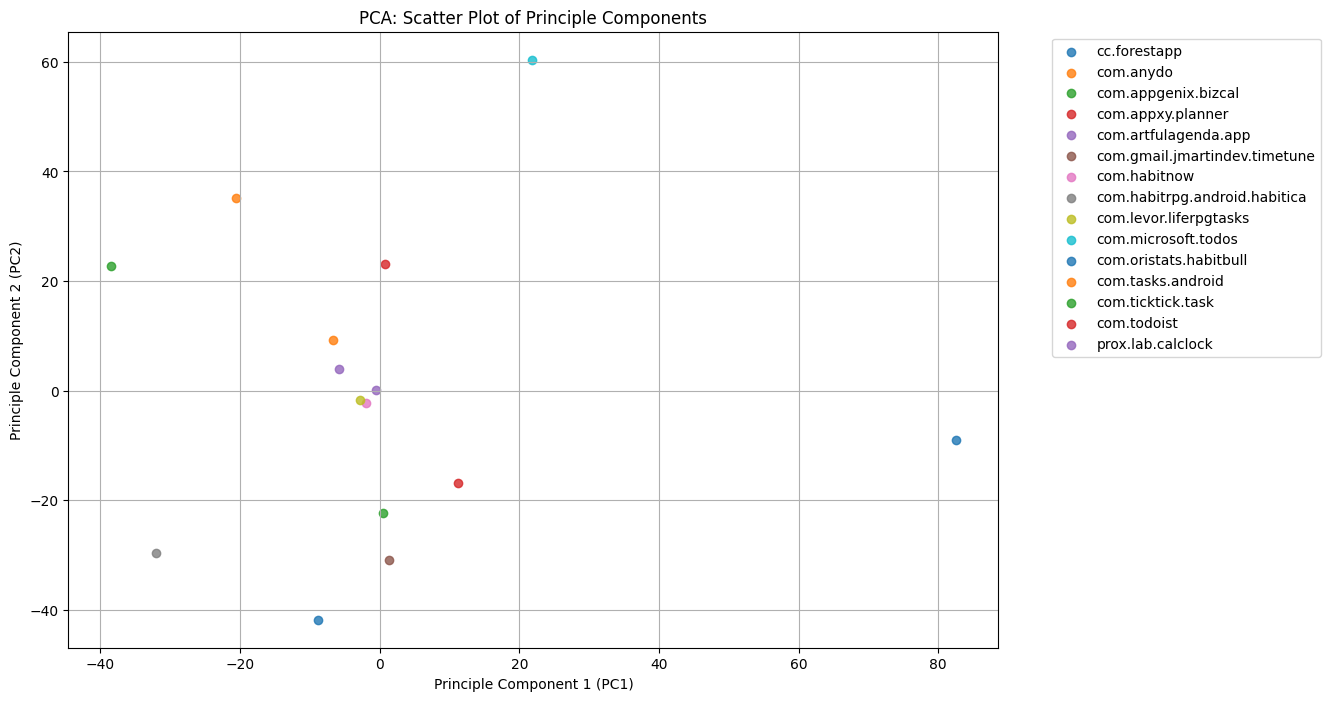

In [54]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(centered_matrix)

# Create a DataFrame with the principle components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=centered_matrix.index)

# Display the results
pc_df
colors = cycle(plt.cm.tab10.colors)

# Plot the results with different colors for each appId
plt.figure(figsize=(12, 8))
for appId, color in zip(pc_df.index, colors):
    plt.scatter(pc_df.loc[appId, 'PC1'], pc_df.loc[appId, 'PC2'], label=appId, color=color, alpha=0.8)

plt.title('PCA: Scatter Plot of Principle Components')
plt.xlabel('Principle Component 1 (PC1)')
plt.ylabel('Principle Component 2 (PC2)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

To determine the "intrinsic" dimensionality and find the number of principal components needed to explain a certain percentage of the variance, you can examine the explained variance ratio provided by PCA. Here's the code to find the number of principal components needed to explain 80% and 40% of the variance:



In [55]:
pca = PCA()
principal_components = pca.fit_transform(centered_matrix)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the number of principal components needed to explain 80% and 40% of the variance
variance_threshold_80 = 0.8
variance_threshold_40 = 0.4

cumulative_variance = explained_variance_ratio.cumsum()

num_components_80 = sum(cumulative_variance < variance_threshold_80) + 1
num_components_40 = sum(cumulative_variance < variance_threshold_40) + 1

print(f"Number of principal components to explain 80% of the variance: {num_components_80}")
print(f"Number of principal components to explain 40% of the variance: {num_components_40}")

Number of principal components to explain 80% of the variance: 11
Number of principal components to explain 40% of the variance: 6


In this code:

I calculate the explained variance ratio for each principal component.
I find the number of principal components needed to explain 80% and 40% of the variance.
Comparing these results to k=2, you can assess how well the reduced-dimensional representation captures the variance in the data. If the intrinsic dimensionality is significantly lower than k=2, it suggests that the original PCA visualization may not be the most informative, and a lower-dimensional representation could be used.

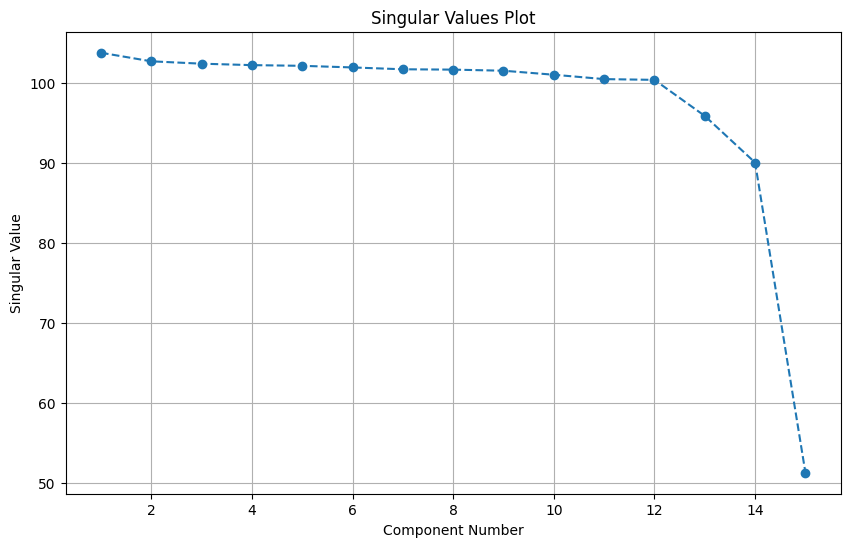

In [56]:
k_components = 15
svd = TruncatedSVD(n_components=k_components)
svd.fit(matrix)

# Plot the resulting singular values
plt.figure(figsize=(10, 6))
plt.plot(range(1, k_components + 1), svd.singular_values_, marker='o', linestyle='--')
plt.title('Singular Values Plot')
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

In [57]:
k_values = [2, 4, 8, 15]

# Calculate and print the sum of explained variance ratio for each k
for k in k_values:
    svd = TruncatedSVD(n_components=k)
    svd.fit(matrix)
    explained_variance_ratio_sum = np.sum(svd.explained_variance_ratio_)
    print(f"Sum of Explained Variance Ratio for k={k}: {explained_variance_ratio_sum}")

Sum of Explained Variance Ratio for k=2: 0.1051145759673921
Sum of Explained Variance Ratio for k=4: 0.25745147932262386
Sum of Explained Variance Ratio for k=8: 0.5623148123107383
Sum of Explained Variance Ratio for k=15: 0.9999999999999951


[[ 1.03459062  1.17529792]
 [ 1.28464818  0.48880313]
 [ 0.91177031 -0.16118716]
 ...
 [ 0.13789614  0.85370548]
 [ 1.50325621 -1.21589593]
 [ 0.23205293 -0.13136337]]


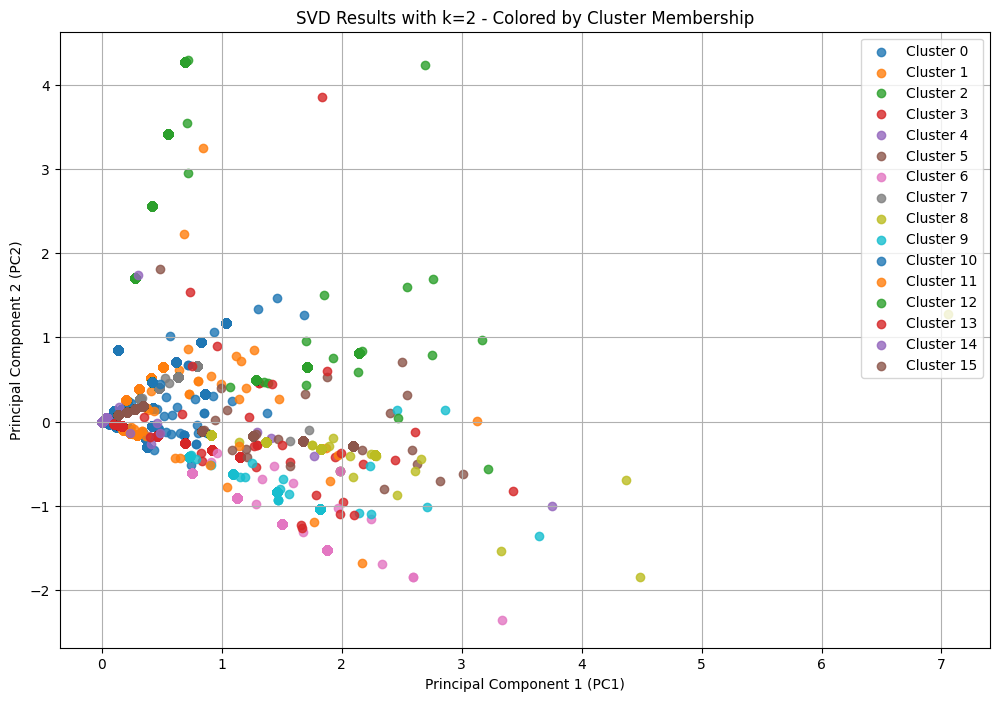

In [58]:
k_components_svd = 2
svd = TruncatedSVD(n_components=k_components_svd, random_state = np.random.seed(2048))
svd_result = svd.fit_transform(matrix)
print(svd_result)

# Plot the results and color users by cluster membership
plt.figure(figsize=(12, 8))
for cluster, cluster_data in df.groupby('cluster'):
    user_indices = matrix.index.isin(cluster_data['userName'])
    plt.scatter(svd_result[user_indices, 0], svd_result[user_indices, 1], label=f'Cluster {cluster}', alpha=0.8)

plt.title('SVD Results with k=2 - Colored by Cluster Membership')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,cluster
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo,0
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo,0
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo,0
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo,0
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner,15
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner,15
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner,15
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner,15
